In [35]:
### Code to perform Principal Component Analysis in Python ###

### This example is taken from the great STATQUEST series by Josh Starmer on youtube 
### Part of my presentation relates to his videos on PCA. Please, check it out at: 
### https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw ### CHANNEL
### https://www.youtube.com/watch?v=FgakZw6K1QQ&t=654s ### PCA STEP-BY-STEP

# IMPORT LIBRARIES #

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import random as rd

%matplotlib inline

In [90]:
# HERE I GENERATE SOME EXPRESSION DATA ON WHICH TO APPLY PCA #
# NB: you don't have to run this part of code if you have real data. Instead, load your real data in a pandas dataframe

# here I generate the names of my genes and conditions
genes = ["gene{}".format(i) for i in range(1,101)]
wt = ["wt_{}".format(i) for i in range(1,6)]
ko = ["ko_{}".format(i) for i in range(1,6)]

# here I create a dataframe that is going to store our expression data
expression_data = pd.DataFrame(columns=[*wt,*ko], index=genes)

# and here I generate the expression data, which are following two different poisson distributions for wt and ko
for gene in expression_data.index:
    expression_data.loc[gene, 'wt_1':'wt_5'] = np.random.poisson(lam = rd.randrange(10,1000), size=5)
    expression_data.loc[gene, 'ko_1':'ko_5'] = np.random.poisson(lam = rd.randrange(10,1000), size=5)


In [91]:
# HERE WE PERFORM THE PREPROCESSING: WE SENTER AND SCALE THE DATA

scaled_data = scale(expression_data.T)

# HERE WE PERFORM THE ACTUAL PCA... IT'S AS EASY AS SUCH!
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

Text(0.5,1,'SCREE PLOT')

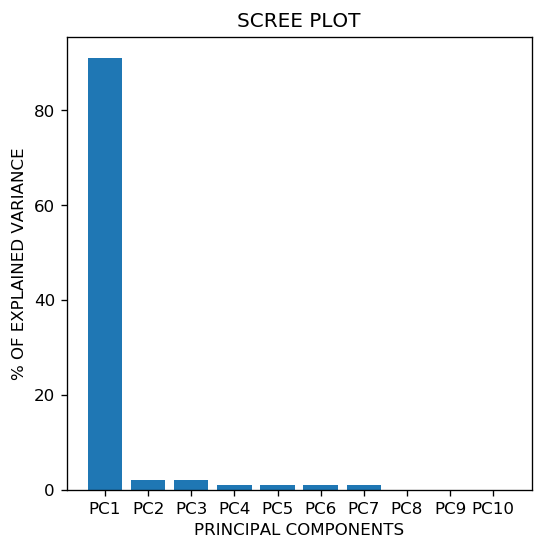

In [92]:
# HERE WE GENERATE A SCREE PLOT #

per_variance = [round(i,2)*100 for i in pca.explained_variance_ratio_]
labels = ["PC{}".format(i) for i in range(len(per_variance)+1)[1:]]

plt.figure(dpi = 120, figsize=(5,5))
plt.bar(range(1,len(per_variance)+1), per_variance, tick_label = labels)
plt.ylabel("% OF EXPLAINED VARIANCE")
plt.xlabel("PRINCIPAL COMPONENTS")
plt.title("SCREE PLOT")

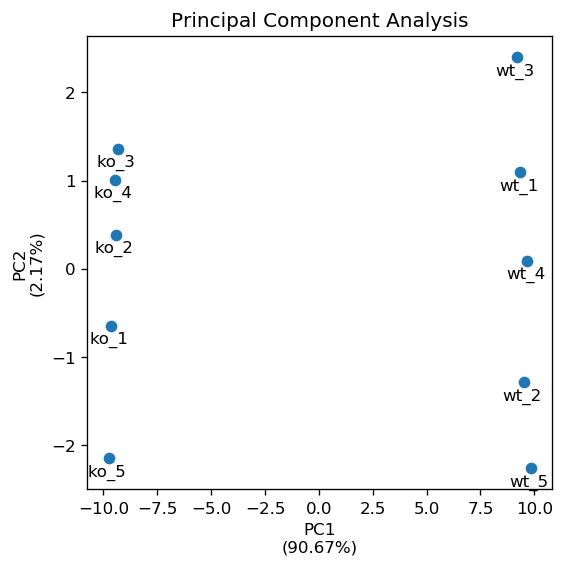

In [93]:
# HERE WE PLOT THE ACTUAL PCA PLOT

# first, let's put the data into a nice dataframe format
pca_df = pd.DataFrame(pca_data, index=[*wt,*ko], columns=labels)

plt.figure(dpi=120, figsize=(5,5))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("Principal Component Analysis")
plt.xlabel("PC1\n({}%)".format(round(pca.explained_variance_ratio_[0]*100,2)))
plt.ylabel("PC2\n({}%)".format(round(pca.explained_variance_ratio_[1]*100,2)))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample]-1, pca_df.PC2.loc[sample]-0.2))


In [94]:
# LASTLY, WE EXTRACT THE TOP 10 GENES THAT ARE RESPONSIBLE FOR THE VARIANCE CAPTURED BY PC1 and PC2

loading_scores_PC1 = pd.Series(pca.components_[0], index = genes)
sorted_loadings_PC1 = loading_scores_PC1.abs().sort_values(ascending=False)

top_10_genes_PC1 = sorted_loadings_PC1[:10].index.values
print("TOP 10 PC1 GENES:\n",loading_scores_PC1[top_10_genes_PC1],'\n')

loading_scores_PC2 = pd.Series(pca.components_[1], index = genes)
sorted_loadings_PC2 = loading_scores_PC2.abs().sort_values(ascending=False)

top_10_genes_PC2 = sorted_loadings_PC2[:10].index.values
print("TOP 10 PC2 GENES:\n",loading_scores_PC2[top_10_genes_PC2])

TOP 10 PC1 GENES:
 gene36    0.104988
gene79    0.104971
gene15   -0.104963
gene83   -0.104956
gene67    0.104946
gene8     0.104918
gene52    0.104908
gene84    0.104899
gene45   -0.104895
gene47   -0.104894
dtype: float64 

TOP 10 PC2 GENES:
 gene14   -0.560258
gene87   -0.345413
gene95   -0.249658
gene2    -0.245509
gene12   -0.242204
gene46   -0.226809
gene16   -0.185407
gene18   -0.163734
gene70    0.157031
gene31    0.151761
dtype: float64
